In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [4]:
data=pd.read_csv("iBuy.csv")
df=pd.DataFrame(data)
df.head()

SERIAL  GENDER  FAMILY_INFLUENCE  FRIENDS_INFLUENCE  APPLE_ECOSYSTEM  \
0       1       1                 0                  0                0   
1       2       2                 1                  1                0   
2       3       1                 0                  1                0   
3       4       0                 1                  1                0   
4       5       1                 0                  1                0   

   EMPLOYMENT  INCOME  AGE  CARRIER_LOCK  THIRD_PARTY  IPHONE_11_PURCHASE  \
0           1   14809   53             0            1                   1   
1           1   11264   47             1            0                   1   
2           0   13463   28             1            1                   0   
3           0   14064   25             0            1                   1   
4           0   19413   51             1            1                   1   

   EMI  IPHONE_12_PURCHASE NAMES  
0    1                   0  Ngga  
1    1                   1  Beli  
2    1                   0  Ngga  
3    1                   1  Beli  
4    1                   0  Ngga

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SERIAL              426 non-null    int64 
 1   GENDER              426 non-null    int64 
 2   FAMILY_INFLUENCE    426 non-null    int64 
 3   FRIENDS_INFLUENCE   426 non-null    int64 
 4   APPLE_ECOSYSTEM     426 non-null    int64 
 5   EMPLOYMENT          426 non-null    int64 
 6   INCOME              426 non-null    int64 
 7   AGE                 426 non-null    int64 
 8   CARRIER_LOCK        426 non-null    int64 
 9   THIRD_PARTY         426 non-null    int64 
 10  IPHONE_11_PURCHASE  426 non-null    int64 
 11  EMI                 426 non-null    int64 
 12  IPHONE_12_PURCHASE  426 non-null    int64 
 13  NAMES               426 non-null    object
dtypes: int64(13), object(1)
memory usage: 46.7+ KB


In [6]:
df.drop('INCOME', axis=1, inplace=True)
df.drop('AGE', axis=1, inplace=True)
df.drop('NAMES', axis=1, inplace=True)
df.drop('SERIAL', axis=1, inplace=True)
df.head()

GENDER  FAMILY_INFLUENCE  FRIENDS_INFLUENCE  APPLE_ECOSYSTEM  EMPLOYMENT  \
0       1                 0                  0                0           1   
1       2                 1                  1                0           1   
2       1                 0                  1                0           0   
3       0                 1                  1                0           0   
4       1                 0                  1                0           0   

   CARRIER_LOCK  THIRD_PARTY  IPHONE_11_PURCHASE  EMI  IPHONE_12_PURCHASE  
0             0            1                   1    1                   0  
1             1            0                   1    1                   1  
2             1            1                   0    1                   0  
3             0            1                   1    1                   1  
4             1            1                   1    1                   0

In [7]:
df.shape

(426, 10)

In [8]:
x=df.drop(['IPHONE_12_PURCHASE'], axis=1)
y=df.drop(['GENDER','FAMILY_INFLUENCE','FRIENDS_INFLUENCE','APPLE_ECOSYSTEM',
           'CARRIER_LOCK','THIRD_PARTY','EMPLOYMENT','EMI','IPHONE_11_PURCHASE'], axis=1)
print(x)
print(y)

     GENDER  FAMILY_INFLUENCE  FRIENDS_INFLUENCE  APPLE_ECOSYSTEM  EMPLOYMENT  \
0         1                 0                  0                0           1   
1         2                 1                  1                0           1   
2         1                 0                  1                0           0   
3         0                 1                  1                0           0   
4         1                 0                  1                0           0   
..      ...               ...                ...              ...         ...   
421       0                 0                  0                0           0   
422       1                 1                  0                0           1   
423       0                 0                  0                0           1   
424       1                 0                  0                0           0   
425       0                 1                  1                0           0   

     CARRIER_LOCK  THIRD_PA

In [9]:
x = x.astype('category')
y = y.astype('category')
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   GENDER              426 non-null    category
 1   FAMILY_INFLUENCE    426 non-null    category
 2   FRIENDS_INFLUENCE   426 non-null    category
 3   APPLE_ECOSYSTEM     426 non-null    category
 4   EMPLOYMENT          426 non-null    category
 5   CARRIER_LOCK        426 non-null    category
 6   THIRD_PARTY         426 non-null    category
 7   IPHONE_11_PURCHASE  426 non-null    category
 8   EMI                 426 non-null    category
dtypes: category(9)
memory usage: 5.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   IPHONE_12_PURCHASE  426 non-null    category
dtypes: category(1)
memory usage: 678.0 bytes


In [10]:
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   GENDER              426 non-null    category
 1   FAMILY_INFLUENCE    426 non-null    category
 2   FRIENDS_INFLUENCE   426 non-null    category
 3   APPLE_ECOSYSTEM     426 non-null    category
 4   EMPLOYMENT          426 non-null    category
 5   CARRIER_LOCK        426 non-null    category
 6   THIRD_PARTY         426 non-null    category
 7   IPHONE_11_PURCHASE  426 non-null    category
 8   EMI                 426 non-null    category
dtypes: category(9)
memory usage: 5.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   IPHONE_12_PURCHASE  426 non-null    category
dtypes: category(1)
memory usage: 678.0 bytes


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
print("Jumlah Training Data : ", len(x_train), " | Jumlah Test Data : ", len(x_test))


Jumlah Training Data :  340  | Jumlah Test Data :  86


In [14]:
clf = BernoulliNB()
clf.fit(x_train, y_train)
clf.get_params()

C:\Users\Asus\anaconda3\envs\TugasDatmin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [15]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [20]:
print('Clf score: ',clf.score(x_train, y_train))

Clf score:  0.7352941176470589


In [17]:
y_test

IPHONE_12_PURCHASE
13                   0
121                  1
351                  1
279                  0
173                  0
..                 ...
424                  0
298                  0
31                   0
59                   1
95                   0

[86 rows x 1 columns]

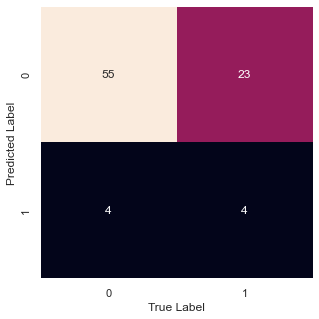

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=[0,1],
           yticklabels=[0,1])

plt.xlabel('True Label')
plt.ylabel('Predicted Label');

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [61]:
iris = load_iris(as_frame = True)
X, y = (iris.data, iris.target)
iris.frame

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  112  | Jumlah Test Data :  38


In [63]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [64]:
y_pred = clf.predict(X_test)
print(pd.DataFrame({'Prediction Label' : iris.target_names[y_pred],
              'Actual Label': iris.target_names[y_test]}))

   Prediction Label Actual Label
0         virginica    virginica
1        versicolor   versicolor
2            setosa       setosa
3         virginica    virginica
4            setosa       setosa
5         virginica    virginica
6            setosa       setosa
7        versicolor   versicolor
8        versicolor   versicolor
9        versicolor   versicolor
10        virginica    virginica
11       versicolor   versicolor
12       versicolor   versicolor
13       versicolor   versicolor
14       versicolor   versicolor
15           setosa       setosa
16       versicolor   versicolor
17       versicolor   versicolor
18           setosa       setosa
19           setosa       setosa
20        virginica    virginica
21       versicolor   versicolor
22           setosa       setosa
23           setosa       setosa
24        virginica    virginica
25           setosa       setosa
26           setosa       setosa
27       versicolor   versicolor
28       versicolor   versicolor
29        

In [65]:
print('Accuracy: ',clf.score(X_train, y_train))

Accuracy:  0.9464285714285714


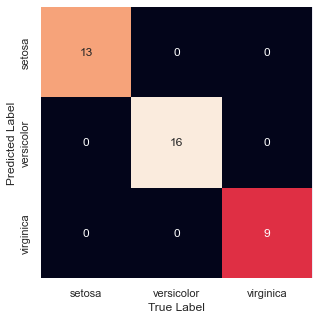

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=iris.target_names, 
           yticklabels=iris.target_names)

plt.xlabel('True Label')
plt.ylabel('Predicted Label');